In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy.stats import chi2_contingency

In [2]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [3]:
mem.loc[mem['주소지'].isna(),'주소지'] = '경기도'
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna()]

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지


> 세부 주소지는 경기도의 최빈값인 ('수원시') 처리

In [4]:
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna(), '세부주소지'] = '수원시'

> 세부주소지 결측 6개의 주소지는 세종특별자치시, 따라서 세종특별자치시 최빈값인 ('조치원읍')처리

In [5]:
mem.loc[mem['주소지'].eq('세종특별자치시') & mem['세부주소지'].isna(), '세부주소지'] = '조치원읍'

> 경기(14), 강원(1), 서울(2), 광주(3) 전부 경기도, 강원도, 서울특별시, 광주광역시로 통일

In [6]:
mem['주소지'] = mem['주소지'].replace('경기','경기도')
mem['주소지'] = mem['주소지'].replace('광주','광주광역시')
mem['주소지'] = mem['주소지'].replace('서울','서울특별시')
mem['주소지'] = mem['주소지'].replace('강원','강원도')

In [7]:
mem['주소지'].value_counts()

경기도        2299
서울특별시      1479
부산광역시      1396
경상남도       1305
경상북도        801
대구광역시       654
강원도         597
충청남도        575
충청북도        527
인천광역시       523
전라북도        488
대전광역시       488
울산광역시       419
광주광역시       392
전라남도        360
제주특별자치도     126
세종특별자치시     111
Name: 주소지, dtype: int64

In [8]:
mem['주소지'].value_counts()

경기도        2299
서울특별시      1479
부산광역시      1396
경상남도       1305
경상북도        801
대구광역시       654
강원도         597
충청남도        575
충청북도        527
인천광역시       523
전라북도        488
대전광역시       488
울산광역시       419
광주광역시       392
전라남도        360
제주특별자치도     126
세종특별자치시     111
Name: 주소지, dtype: int64

In [9]:
mem = mem[mem['주소지']=='경기도']

In [15]:
mem['주소지'].value_counts()

경기도    2299
Name: 주소지, dtype: int64

In [10]:
mem.groupby('세부주소지')['구독여부'].value_counts().unstack() 

구독여부,False,True
세부주소지,,
가평군,31.0,6.0
고양시,96.0,26.0
과천시,1.0,NaN
광명시,8.0,4.0
광주시,15.0,3.0
구리시,16.0,1.0
군포시,12.0,1.0
김포시,41.0,12.0
남양주시,48.0,13.0


In [11]:
age_subscription_counts = mem.groupby('세부주소지')['구독여부'].value_counts().unstack()

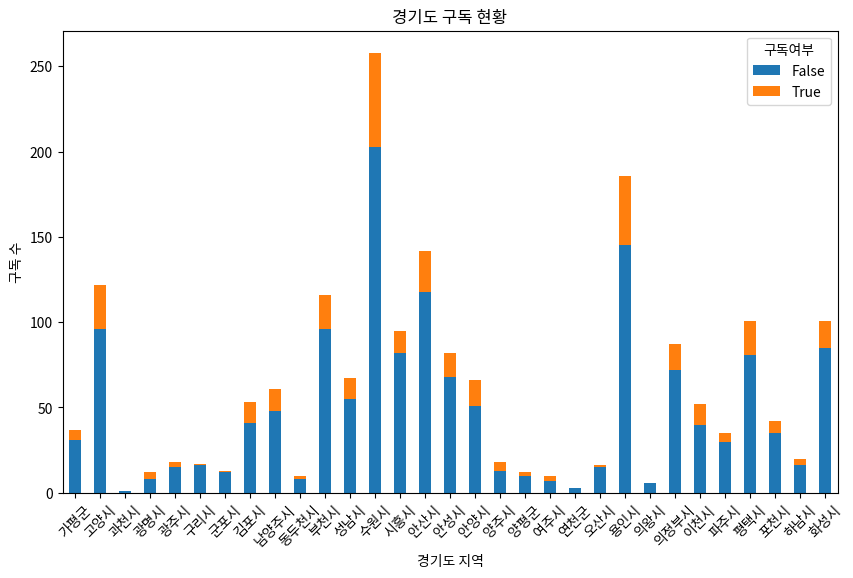

In [12]:
age_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('경기도 구독 현황')
plt.xlabel('경기도 지역')
plt.ylabel('구독 수')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [13]:
# 연령대별 구독 여부 비율 계산
age_subscription_ratios = mem.groupby('세부주소지')['구독여부'].value_counts(normalize=True).unstack().fillna(0)
print(age_subscription_ratios)

구독여부      False     True 
세부주소지                    
가평군    0.837838  0.162162
고양시    0.786885  0.213115
과천시    1.000000  0.000000
광명시    0.666667  0.333333
광주시    0.833333  0.166667
구리시    0.941176  0.058824
군포시    0.923077  0.076923
김포시    0.773585  0.226415
남양주시   0.786885  0.213115
동두천시   0.800000  0.200000
부천시    0.827586  0.172414
성남시    0.820896  0.179104
수원시    0.786822  0.213178
시흥시    0.863158  0.136842
안산시    0.830986  0.169014
안성시    0.829268  0.170732
안양시    0.772727  0.227273
양주시    0.722222  0.277778
양평군    0.833333  0.166667
여주시    0.700000  0.300000
연천군    1.000000  0.000000
오산시    0.937500  0.062500
용인시    0.779570  0.220430
의왕시    1.000000  0.000000
의정부시   0.827586  0.172414
이천시    0.769231  0.230769
파주시    0.857143  0.142857
평택시    0.801980  0.198020
포천시    0.833333  0.166667
하남시    0.800000  0.200000
화성시    0.841584  0.158416


In [14]:
# 교차 테이블 생성
cross_table = pd.crosstab(mem['세부주소지'], mem['구독여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

# 결과 출력
print("카이제곱 값:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도:", expected)
print("결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 지역별 구독여부는 동일하다.")

카이제곱 값: 19.09087903836295
p-value: 0.9380848431620669
자유도: 30
예상 빈도: [[2.99940828e+01 7.00591716e+00]
 [9.88994083e+01 2.31005917e+01]
 [8.10650888e-01 1.89349112e-01]
 [9.72781065e+00 2.27218935e+00]
 [1.45917160e+01 3.40828402e+00]
 [1.37810651e+01 3.21893491e+00]
 [1.05384615e+01 2.46153846e+00]
 [4.29644970e+01 1.00355030e+01]
 [4.94497041e+01 1.15502959e+01]
 [8.10650888e+00 1.89349112e+00]
 [9.40355030e+01 2.19644970e+01]
 [5.43136095e+01 1.26863905e+01]
 [2.09147929e+02 4.88520710e+01]
 [7.70118343e+01 1.79881657e+01]
 [1.15112426e+02 2.68875740e+01]
 [6.64733728e+01 1.55266272e+01]
 [5.35029586e+01 1.24970414e+01]
 [1.45917160e+01 3.40828402e+00]
 [9.72781065e+00 2.27218935e+00]
 [8.10650888e+00 1.89349112e+00]
 [2.43195266e+00 5.68047337e-01]
 [1.29704142e+01 3.02958580e+00]
 [1.50781065e+02 3.52189349e+01]
 [4.86390533e+00 1.13609467e+00]
 [7.05266272e+01 1.64733728e+01]
 [4.21538462e+01 9.84615385e+00]
 [2.83727811e+01 6.62721893e+00]
 [8.18757396e+01 1.91242604e+01]
 [3.404